# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [164]:
df=pd.read_csv(r"C:\Users\88693\Desktop\IMLP372 機器學習\Unit02\data\grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [7]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [9]:
type(df)

pandas.core.frame.DataFrame

如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [14]:
df1=df["國文"]
df1

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [16]:
df2=df['英文']
df2

0     10
1     10
2     15
3     10
4     12
      ..
95    10
96    10
97     9
98     9
99    11
Name: 英文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

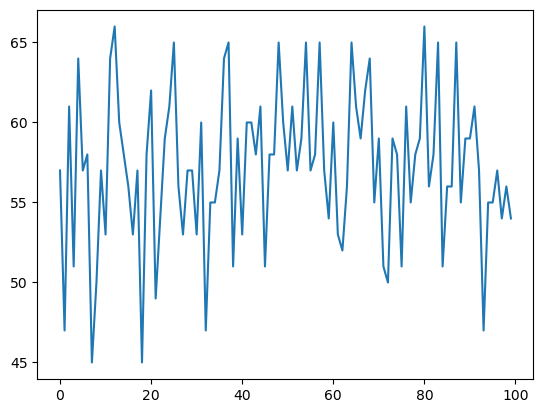

In [43]:
df3=df['sum']
df3.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:xlabel='Level'>

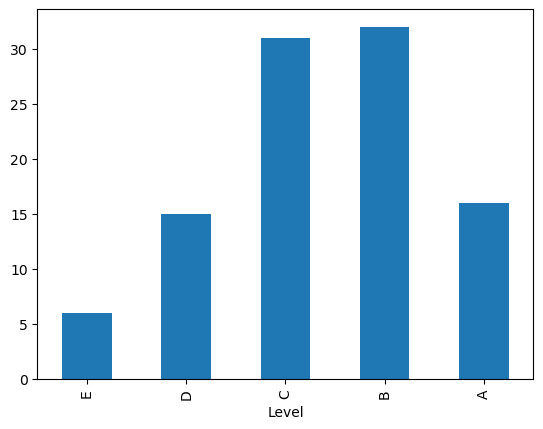

In [99]:
level=["E","D","C","B","A"]
df['Level']=pd.cut(df['sum'],5,labels=level)
levels=df.groupby('Level')
c=levels.size()
c.plot(kind="bar")

## 3 一些基本的資料分析

算平均。

In [114]:
df1.mean()


11.39

算標準差。

In [115]:
df1.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [116]:
df.describe()

,國文,英文,數學,自然,社會,sum
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.0000
mean,11.390000,11.380000,11.570000,11.03000,11.83000,57.2000
std,2.196853,2.273164,2.310516,2.21772,2.48655,4.8053
min,8.000000,8.000000,8.000000,8.00000,8.00000,45.0000
25%,9.000000,9.000000,10.000000,9.00000,9.00000,54.7500
50%,11.000000,11.000000,11.000000,11.00000,12.00000,57.0000
75%,13.000000,13.000000,14.000000,13.00000,14.00000,60.0000
max,15.000000,15.000000,15.000000,15.00000,15.00000,66.0000


有時我們很愛看的相關係數矩陣。

In [117]:
df.corr()

,國文,英文,數學,自然,社會,sum
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421,0.317865
英文,0.160158,1.000000,0.025656,0.113929,-0.063512,0.578324
數學,-0.310899,0.025656,1.000000,0.014371,0.041651,0.379013
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594,0.390891
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000,0.422178
sum,0.317865,0.578324,0.379013,0.390891,0.422178,1.000000


只算兩科間的相關係數當然也可以。

In [122]:
df['國文'].corr(df['數學'])

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [185]:
df['總級分']=df.sum(axis=1)
df

C:\Users\88693\AppData\Local\Temp\ipykernel_21068\775484239.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['總級分']=df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,163,49
1,胡玉華,10,10,10,8,9,134,40
2,黃淑婷,13,15,8,11,14,166,44
3,陳上紫,10,10,8,9,14,138,36
4,崔靜成,13,12,14,12,13,181,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,147,37
96,吳筱婷,8,10,14,10,15,160,46
97,陳家銘,14,9,11,8,12,153,45
98,李明威,15,9,8,9,15,152,40


### 【技巧】

有計算的當然也可以的。

In [166]:
df['加權']=df.國文+df.英文+df.數學*2

In [167]:
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [175]:
df.sort_values(by='總級分',ascending=False)

### 【重點】排序的方法

加權分最高, 同分才看總級分

In [194]:
df_df=df.sort_values(by=["加權","總級分"],ascending=False)

### 【重點】重設 index

In [177]:
df_df.index=range(1,101)
df_df

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [178]:
df_df[df_df.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [180]:
df_df[(df_df.數學==15) & (df_df.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [187]:
df_df=df_df.drop("總級分",axis=1)
df_df

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [192]:
df_df.drop("總級分",axis=1,inplace=True)
df_df

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [196]:
df_df.drop(3)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,176,58
57,胡淳茜,12,15,14,13,11,185,55
36,詹威德,12,13,15,10,14,183,55
25,蔡亦瑄,13,13,14,13,12,184,54
83,李士賢,10,14,15,13,13,184,54
...,...,...,...,...,...,...,...,...
7,林金鳳,8,9,10,10,8,127,37
84,胡凱琳,10,8,9,9,15,138,36
32,林建亨,9,11,8,8,11,130,36
18,梁慧君,9,8,8,8,12,123,33


In [197]:
df_df.drop(df_df[df_df.姓名=='李士賢'].index)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,176,58
57,胡淳茜,12,15,14,13,11,185,55
36,詹威德,12,13,15,10,14,183,55
25,蔡亦瑄,13,13,14,13,12,184,54
44,童心怡,13,13,14,8,13,176,54
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,138,36
84,胡凱琳,10,8,9,9,15,138,36
32,林建亨,9,11,8,8,11,130,36
18,梁慧君,9,8,8,8,12,123,33


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [198]:
df_df.drop(df_df[df_df.姓名=='陳上紫'].index)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,176,58
57,胡淳茜,12,15,14,13,11,185,55
36,詹威德,12,13,15,10,14,183,55
25,蔡亦瑄,13,13,14,13,12,184,54
83,李士賢,10,14,15,13,13,184,54
...,...,...,...,...,...,...,...,...
7,林金鳳,8,9,10,10,8,127,37
84,胡凱琳,10,8,9,9,15,138,36
32,林建亨,9,11,8,8,11,130,36
18,梁慧君,9,8,8,8,12,123,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [204]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [205]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,43.154999,42.407501,43.119999,42.450001,130169600.0,40.365696
2017-12-05,42.880001,42.099998,42.264999,42.410000,109400800.0,40.327663
2017-12-06,42.549999,41.615002,41.875000,42.252499,114240000.0,40.177883
2017-12-07,42.610001,42.227501,42.257500,42.330002,102693200.0,40.251579
2017-12-08,42.750000,42.205002,42.622501,42.342499,93420800.0,40.263474


#### 只要最後 300 個交易日!

In [206]:
df=df[-300:]

In [207]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-27,145.960007,143.820007,145.470001,145.369995,74150700.0,144.320541
2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0,140.885513
2021-09-29,144.449997,142.029999,142.470001,142.830002,74602000.0,141.798889
2021-09-30,144.380005,141.279999,143.660004,141.500000,89056700.0,140.478485
2021-10-01,142.919998,139.110001,141.899994,142.649994,94639600.0,141.620163
...,...,...,...,...,...,...
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

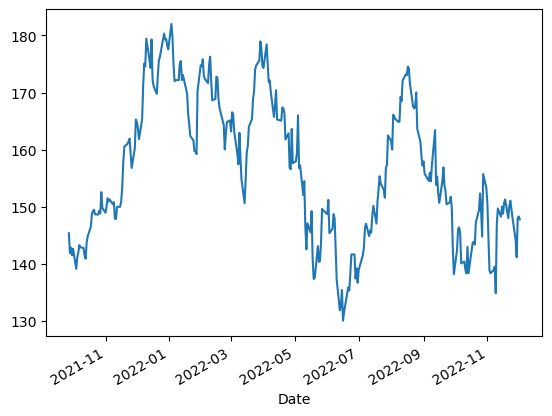

In [211]:
df.Close.plot()


<AxesSubplot:xlabel='Date'>

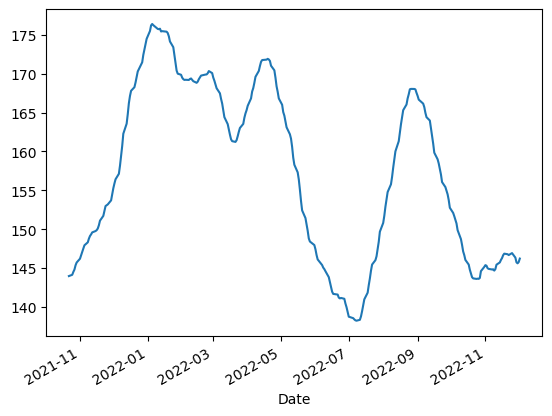

In [212]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

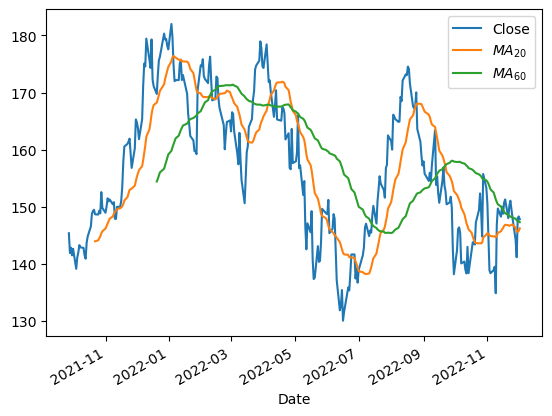

In [213]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [214]:
close=df.Close.values
len(close)

300

In [215]:
x=close[:-1]
len(x)

299

In [216]:
y=close[1:]
len(y)

299

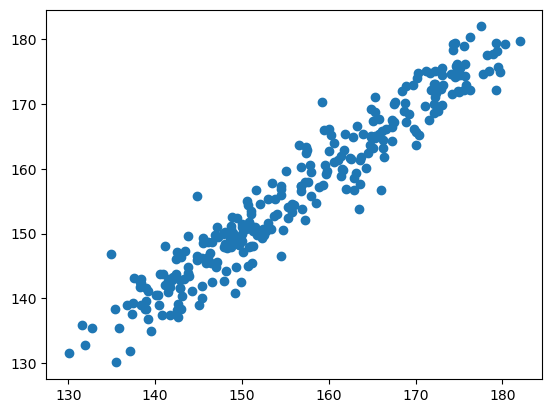

In [217]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [218]:
mydata = np.random.randn(4,3)

In [219]:
mydata

array([[ 0.09706704,  1.2259995 , -2.26867182],
       [ 0.1084946 , -0.8461411 , -0.45068502],
       [-0.96369738,  0.39709845, -1.6994495 ],
       [ 0.89057754,  0.86482915,  0.804111  ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [220]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [221]:
df2

,A,B,C
0,0.097067,1.225999,-2.268672
1,0.108495,-0.846141,-0.450685
2,-0.963697,0.397098,-1.699450
3,0.890578,0.864829,0.804111


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [222]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [223]:
df3

,A,B,C
0,0.660461,0.834760,-0.801953
1,0.841001,-1.445611,0.108899
2,-1.368455,-1.064745,-1.130085


In [228]:
df4=pd.concat([df2,df3])

In [229]:
df4

,A,B,C
0,0.097067,1.225999,-2.268672
1,0.108495,-0.846141,-0.450685
2,-0.963697,0.397098,-1.699450
3,0.890578,0.864829,0.804111
0,0.660461,0.834760,-0.801953
1,0.841001,-1.445611,0.108899
2,-1.368455,-1.064745,-1.130085


前面我們弄得亂七八糟的 index 重設一下。

In [230]:
df4.index=range(7)

In [231]:
df4

,A,B,C
0,0.097067,1.225999,-2.268672
1,0.108495,-0.846141,-0.450685
2,-0.963697,0.397098,-1.699450
3,0.890578,0.864829,0.804111
4,0.660461,0.834760,-0.801953
5,0.841001,-1.445611,0.108899
6,-1.368455,-1.064745,-1.130085


#### 横向的貼

In [232]:
df5=df4=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [233]:
df5

,A,B,C,A,B,C
0,0.097067,1.225999,-2.268672,0.660461,0.834760,-0.801953
1,0.108495,-0.846141,-0.450685,0.841001,-1.445611,0.108899
2,-0.963697,0.397098,-1.699450,-1.368455,-1.064745,-1.130085
3,0.890578,0.864829,0.804111,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [234]:
df_names=pd.read_csv('data/names.csv',names=['姓名'])

In [235]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [236]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [237]:
df_grades

,國文,英文,數學,社會,自然
0,10,10,12,7,13
1,11,11,7,14,14
2,13,14,13,8,8
3,9,10,13,13,9
4,13,13,12,10,9
...,...,...,...,...,...
95,6,14,8,10,12
96,7,14,9,11,10
97,11,13,13,6,15
98,7,6,14,14,6


In [239]:
df_score=pd.concat([df_names,df_grades],axis=1)

In [240]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,10,10,12,7,13
1,王紹尹,11,11,7,14,14
2,黃季坤,13,14,13,8,8
3,許正書,9,10,13,13,9
4,張鈞蓮,13,13,12,10,9
...,...,...,...,...,...,...
95,陳君生,6,14,8,10,12
96,曾桂甫,7,14,9,11,10
97,林欣怡,11,13,13,6,15
98,林佳霖,7,6,14,14,6


In [242]:
df_score.to_csv('data/grades2.csv',index=0)

In [243]:
df_scores=pd.read_csv('data/grades2.csv')

In [244]:
df_scores

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,10,10,12,7,13
1,王紹尹,11,11,7,14,14
2,黃季坤,13,14,13,8,8
3,許正書,9,10,13,13,9
4,張鈞蓮,13,13,12,10,9
...,...,...,...,...,...,...
95,陳君生,6,14,8,10,12
96,曾桂甫,7,14,9,11,10
97,林欣怡,11,13,13,6,15
98,林佳霖,7,6,14,14,6
